## Assuming you covered linear regression

A delivery service offers the same day delivery for letters, packages and small cargo. You are able to use Google maps to group individual deliveries into one trip. Some trips have more than one delivery. You would like to estimate how long a delivery will take:
1. Total distance of the trip in kilometers.
2. The number of deliveries that must be made.

To conduct the analysis take a random sample of 10 past trips and record:

1. Total miles travelled.
2. Number of deliveries.
3. Total time in hours.

|`milesTravelled` | `deliveries` | `time hours` |
|:-------------:|:----------:|:----------:|
|89             | 4          | 7          |   
|66             | 1          | 5.4        |
|78             | 3          | 6.6        |
|111            | 6          | 7.4        |
|44             | 1          | 4.8        |
|77             | 3          | 6.4        |
|80             | 3          | 7          |
|66             | 2          | 5.6        |
|109            | 5          | 7.3        |
|70             | 2          | 6.4        |

##### __In whay way does travel time depend on the other two variables?__

Travel time is the dependent variable and miles travelled and number of deliveries are the independent variables.

* Dependant variable = Response
* Independent variable = Prediction

##### __New considerations when going from simple to multiple regression__ 
 __`Possible Exam Q`__

1. Adding more independant variables to a multiple regression does not mean that the regression is better or that it will offer better predictions. <span  style="color : red"> **_In fact it can be worse._** </span> This is called <span style="color : red"> __OVERFITTING__. </span>

2. The addition of more independant variables creates more relationships among them. So not only do we need to consider the independent variables and the dependent variables, we also need to consider the relationship between the independent variables themselves. This is called <span  style="color : red"> __MULTICOLINEARITY__. </span>

3. The ideal of for all independent variables to be correlated with the dependent variables and <span  style="color : red"> __NOT__ </span> with each other.

4. Because of overfitting and mutlicolinearity, there is a lot of prep-work to do before we start multi-regression
    
    * Scatterplots
    * Correlations
    * Simple regressions between each of the independent variables and dependent variables to see how they are related.

Important to consider which independent variables should make the cut.
Some independent variables are better at predicting the dependent variables than others. Some contributing nothing.

<p style="text-align: center;">Multiple regression model:</p> 

$$ \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon $$

$ y = 27 + 9x_1+12x_2 $

* $x_1$ = capital investment (€1000s)
* $x_2$ = marketing expenses (€1000s)
* y = predicted sales (€1000s)

Each coefficient (9, 12) is interpreted as the estimate in y corresponding to a 1 unit change in variable when all other are held fixed.

€9000 is an estimate of the expected increase in sales y, corresponding to a €1000 increase in capital investement x1 when marketing expenditure x2 are kept fixed.

As the owner you would like to be able to estimate how long a delivery will take based on three factors:

* The total distance of trip in miles.
* The number of deliveries
* The fuel price in €

##### `Exam type question`
Conducting multiple regression requires the following steps:

1. Generate a list of independent and dependent variables

2. Collect the data on the variables
3. Check for outliers
4. Check relationships between each independent variable and the dependent variable using scatterplots and correlations.
5. Check relationship between the independent variables using scatterplots and correlations.
6. Conduct simple linear regression for each IV/DV pair.
7. Use non-redundant independent variables in the analysis to find the best fitting model.
8. Use the best fitting model to make predictions about the dependent variable.
<div align="center">

|`milesTravelled` | `deliveries` |`fuel price`|`time hours` |
|:---------------:|:------------:|:----------:|:-----------:|
|89               | 4            |3.84        |7            |
|66               | 1            |3.19        |5.4          |
|78               | 3            |3.78        |6.6          |
|111              | 6            |3.89        |7.4          |
|44               | 1            |3.57        |4.8          |
|77               | 3            |3.57        |6.4          |
|80               | 3            |3.03        |7            |
|66               | 2            |3.51        |5.6          |
|109              | 5            |3.54        |7.3          |
|76               | 3            |3.25        |6.4          |

</div>

In [73]:
miles_traveled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
time_taken = [7, 5.4, 6.6, 7.4, 4.8 ,6.4, 7, 5.6, 7.3, 6.4]
deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
fuel_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]

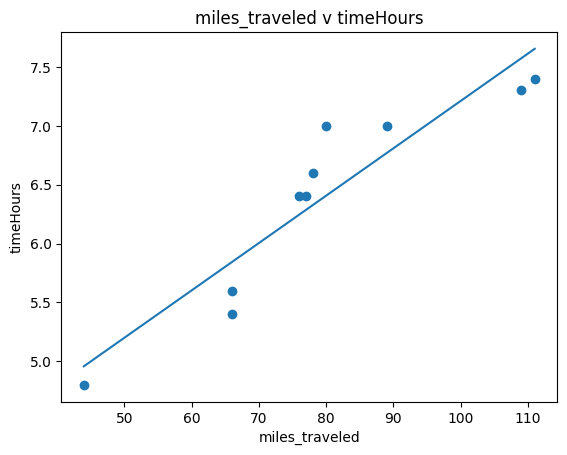

In [74]:
from matplotlib import pyplot as plt
import numpy as np
plt.title("miles_traveled v timeHours")
plt.xlabel("miles_traveled")
plt.ylabel("timeHours")
plt.scatter(miles_traveled,time_taken)
plt.plot(np.unique(miles_traveled), np.poly1d(np.polyfit(miles_traveled, time_taken, 1))(np.unique(miles_traveled)))
plt.show()

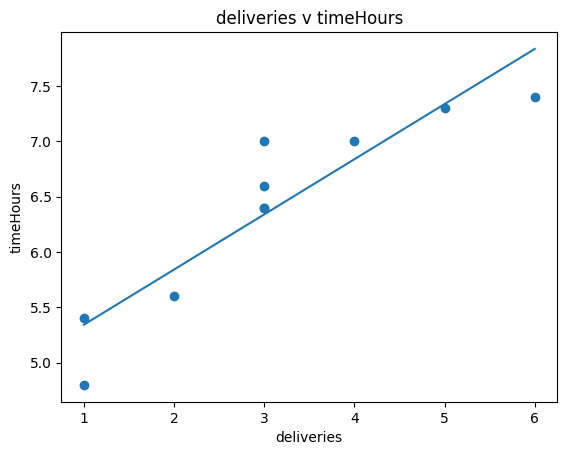

In [75]:
plt.title("deliveries v timeHours")
plt.xlabel("deliveries")
plt.ylabel("timeHours")
plt.scatter(deliveries,time_taken)
plt.plot(np.unique(deliveries), np.poly1d(np.polyfit(deliveries, time_taken, 1))(np.unique(deliveries)))
plt.show()

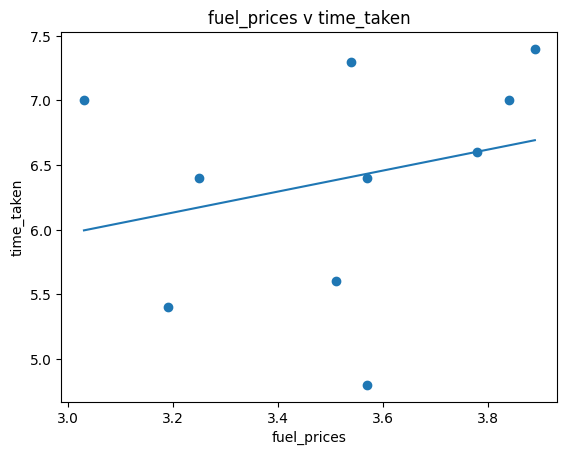

In [76]:
plt.title("fuel_prices v time_taken")
plt.xlabel("fuel_prices")
plt.ylabel("time_taken")
plt.scatter(fuel_prices,time_taken)
plt.plot(np.unique(fuel_prices), np.poly1d(np.polyfit(fuel_prices, time_taken, 1))(np.unique(fuel_prices)))
plt.show()

#### Scatterplot Summary
* Travel time appears highly correlated with miles travelled.
* Travel time appears highly correlated with number of deliveries.
* Travel time does not appear correlated with fuel prices.

Since fuel prices does not appear correlated with travel time we would not use this variable in regression. For learning purposes we will leave this variable in. If this was a real world example we would throw away this variable.

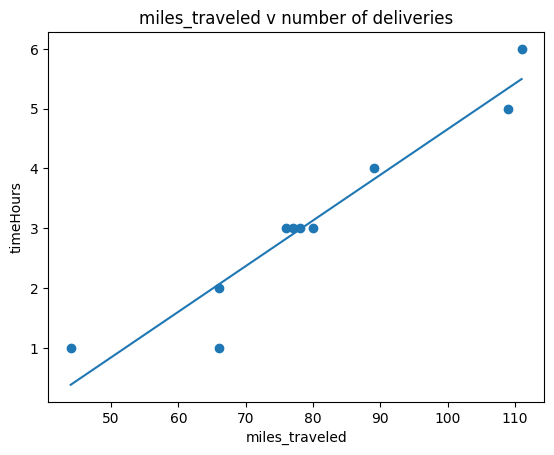

In [77]:
plt.title("miles_traveled v number of deliveries")
plt.xlabel("miles_traveled")
plt.ylabel("timeHours")
plt.scatter(miles_traveled,deliveries)
plt.plot(np.unique(miles_traveled), np.poly1d(np.polyfit(miles_traveled, deliveries, 1))(np.unique(miles_traveled)))
plt.show()

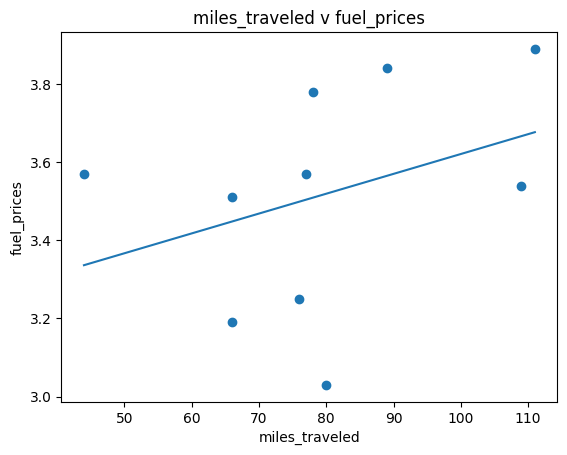

In [78]:
plt.title("miles_traveled v fuel_prices")
plt.xlabel("miles_traveled")
plt.ylabel("fuel_prices")
plt.scatter(miles_traveled,fuel_prices)
plt.plot(np.unique(miles_traveled), np.poly1d(np.polyfit(miles_traveled, fuel_prices, 1))(np.unique(miles_traveled)))
plt.show()

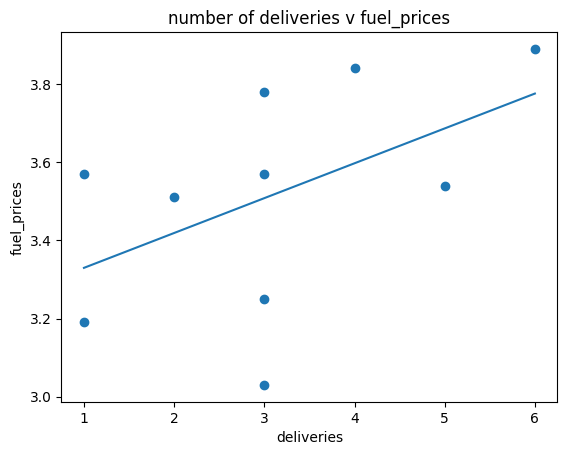

In [79]:
plt.title("number of deliveries v fuel_prices")
plt.xlabel("deliveries")
plt.ylabel("fuel_prices")
plt.scatter(deliveries,fuel_prices)
plt.plot(np.unique(deliveries), np.poly1d(np.polyfit(deliveries, fuel_prices, 1))(np.unique(deliveries)))
plt.show()

#### IV to IV Scatterplot
1. num_deliveries is highly correlated to miles_travelled (<span style="color : red"> multicolinearity = bad </span>)
2. miles_travelled does not correlate to with fuel_prices.
3. num_deliveries does not correlate with fuel_prices.

Since the number of deliveries is highly correlated with miles travelled, I wouldn't use both. They are redundent. </br>

`For now we will keep it for learning purposes`

#### Correlation
`The change in x effects on changing y`

In [80]:
from scipy.stats import pearsonr

In [81]:
corr = pearsonr(miles_traveled, time_taken)
print(corr)

PearsonRResult(statistic=0.9281785008874761, pvalue=0.0001066756542989667)


First value is the correlation (<span style='color:red'> very high </span>) in this specific case. Second value is the p-value. That is the probability that this is a random occurance.

If the p-value is below 0.05 we can say that it is statistically significant

In [82]:
corr = pearsonr(fuel_prices, time_taken)
print(corr)

PearsonRResult(statistic=0.2672115310193847, pvalue=0.45545341268508166)


In [83]:
corr = pearsonr(miles_traveled, deliveries)
print(corr)

PearsonRResult(statistic=0.9558982066200347, pvalue=1.5690314407660616e-05)


In [84]:
corr = pearsonr(miles_traveled, fuel_prices)
print(corr)

PearsonRResult(statistic=0.35579623354708517, pvalue=0.31296405908178965)


In [85]:
corr = pearsonr(deliveries, fuel_prices)
print(corr)

PearsonRResult(statistic=0.4982421647401633, pvalue=0.142741207670319)


Correlation between miles travelled and number of deliveries is 0.955. Extremely strong. A massive red flag for multicolinearity

#### IV Scatterplots and Pearson correlation
1. r = 0.955, p-value = 0.0000156 (<span style='color:red'>__Big Problem__</span>) ~ _These two independent variables should not be used together._
2. r = 0.332, p-value = 0.347 (<span style='color:green'>__Very Good__</span>, _Very weak correlation_)
3. r = 0.472, p-value = 0.16 (<span style='color:green'>__Very Good__</span>, _Very weak correlation_)

Two problematic variables are miles_travelled and num_deliveries. Only include 1 in the regression if not learning.

##### __Correlation__
1. Correlation analysis confirms what we have seen in the scatterplots.

2. Redundant multicolinearity variables miles_travelled and num_deliveries are highly correlated with each other and therefore are redundent. Only one should be used for the analysis
3. Non-contributing variable, fuel_prices are not correlated with the dependent variable and should be excluded.

##### __Review And Conclusion__

1. There is a lot od prep work to do in multi-linear regression.
2. Don't blindly press buttons.
3. Techniques
    * Scatterplot
    * Correlation
    * Individual and Group regression

1. For the sake of learning, we will break the rules and leave all of the independent variables in at first.
2. Then we will remove the problematic variables to see what happens to the regression results.
3. We will also do simple regressions witg the dependent variable to use as a baseline.
4. In the end we will get the best model.

##### __Simple linear regression__

1. First we will conduct simple linear regression for each independent variable seperately.
2. We will interpret the results.
3. We will note how results change.
    * Coeficients - values, t-statistics, p-value
    * ANOVA - analysis of variance, F-value, p-value
    * R-squared, R-squared adjusted

In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
miles_traveled = np.array(miles_traveled).reshape((-1, 1))
model.fit(miles_traveled, time_taken)
r_sq = model.score(miles_traveled, time_taken)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8615153295097224


1. R-squared is the % variation in the dependent variable explained by the independent variable.

2. Standard Error (SE) of the regression is the average distance of the points away from the regression line.

In [87]:
import statsmodels.api as sm

In [88]:
miles_traveled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
miles_traveled = sm.add_constant(miles_traveled)
model = sm.OLS(time_taken, miles_traveled)
results = model.fit()
print(results.summary())
# Line below is to get the standard error
print(results.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000107
Time:                        11:29:38   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1856      0.467      6.822      0.0

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [89]:
number_derliveries = sm.add_constant(deliveries)
model = sm.OLS(time_taken, number_derliveries)
results = model.fit()
print(results.summary())
# Line below is to get the standard error
print(results.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000193
Time:                        11:29:38   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8454      0.265     18.261      0.0

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [90]:
fuel_prices = sm.add_constant(fuel_prices)
model = sm.OLS(time_taken, fuel_prices)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Fri, 09 Feb 2024   Prob (F-statistic):              0.455
Time:                        11:29:38   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5365      3.649      0.969      0.3

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [91]:
miles_traveled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
number_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
data = list(zip(miles_traveled, number_deliveries))

In [92]:
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     23.72
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000763
Time:                        11:29:38   Log-Likelihood:                -1.9830
No. Observations:                  10   AIC:                             9.966
Df Residuals:                       7   BIC:                             10.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7322      0.887      4.208      0.0

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [93]:
miles_traveled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
fuel_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
data = list(zip(miles_traveled, fuel_prices))

In [94]:
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.63
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000879
Time:                        11:29:38   Log-Likelihood:                -2.1863
No. Observations:                  10   AIC:                             10.37
Df Residuals:                       7   BIC:                             11.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8676      1.482      2.609      0.0

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Consider the model above. If deliveries are held constant, then travel time is expected to decrease by 0.7332 of an hour for every additional dollar increase in fuel prices. This makes no sense. The p-value of .15 (>>0.05) indicates that this is going to be an issue.

__How do we decide which is the best model?__

Consider the following factors:
* $R^2$ ajusted.
* F-statistic and its p-value, is the model significant?
* Standard error as small as possible.
* AIC and BIC as small as possible.
* Condition No as small as possible.
* Consider model parameters. What are the p-values> Are they significant?
* Consider the model. Does it make sense for the problem?
* All else being equal we want the simplest model.

`This could be a good exam question`

Give a bunch of different and their ANOVA and ask you to interpret and select the best model.

In [95]:
all_data = list(zip(miles_traveled, number_deliveries, fuel_prices))
print(all_data)

[(89, 4, 3.84), (66, 1, 3.19), (78, 3, 3.78), (111, 6, 3.89), (44, 1, 3.57), (77, 3, 3.57), (80, 3, 3.03), (66, 2, 3.51), (109, 5, 3.54), (76, 3, 3.25)]


In [96]:
all_data = sm.add_constant(all_data)
model = sm.OLS(time_taken, all_data)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     16.99
Date:                Fri, 09 Feb 2024   Prob (F-statistic):            0.00245
Time:                        11:29:38   Log-Likelihood:               -0.98426
No. Observations:                  10   AIC:                             9.969
Df Residuals:                       6   BIC:                             11.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2114      2.321      2.677      0.0

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Data Types__

__Interval Data__
* Temperature
* Money
* Weight of Something

__Categorical Data__
* Week days
* Gender
* Yes/No
* Dundalk/Drogheda

You are an analyst for a small company that develops house price models for auctioneers. To generate the data you use publicly available data such as list price, square footage, number of bedrooms, number of bathrooms. We are interested in another questions: Is the local secondary school excellent (the high rating) and how is that related to house prices?

Secondary school rating is not quantative it is qualitative (catergorical). For each home the secondary school is either excellent or not.

#### House Price

<table style=width:50%>
<tr>
    <th> Price 1000s (y) </th>
    <th> SQFT ($x_1$) </th>
    <th> Excellent ($x_2$) </th>
</tr>
<tr>
    <th>145</th>
    <th>1872</th>
    <th>0</th>
</tr>
<tr>
    <th>69.9</th>
    <th>1454</th>
    <th>0</th>
</tr>
<tr>
    <th>315</th>
    <th>4104</th>
    <th>1</th>
</tr>
<tr>
    <th>144.9</th>
    <th>1524</th>
    <th>0</th>
</tr>
<tr>
    <th>134.9</th>
    <th>1297</th>
    <th>0</th>
</tr>
<tr>
    <th>369</th>
    <th>3278</th>
    <th>1</th>
</tr>
<tr>
    <th>95</th>
    <th>1192</th>
    <th>0</th>
</tr>
<tr>
    <th>228.9</th>
    <th>2252</th>
    <th>1</th>
</tr>
<tr>
    <th>149</th>
    <th>1620</th>
    <th>0</th>
</tr>
<tr>
    <th>295</th>
    <th>2466</th>
    <th>1</th>
</tr>
<tr>
    <th>388.5</th>
    <th>3188</th>
    <th>1</th>
</tr>
<tr>
    <th>75</th>
    <th>1061</th>
    <th>0</th>
</tr>
<tr>
    <th>130</th>
    <th>1195</th>
    <th>0</th>
</tr>
<tr>
    <th>174</th>
    <th>1552</th>
    <th>1</th>
</tr>
<tr>
    <th>334.9</th>
    <th>2901</th>
    <th>1</th>
</tr>

In [97]:
prices = [145, 69.9, 315, 144.9, 134.9, 369, 95, 228.9, 149, 295, 388.5, 75, 130, 174, 334.9]
square_feet = [1872, 1954,4104,1524,1297,3278,1192,2252,1620,2466,3188,1061,1195,1552,2901]
excellent = [0,0,1,0,0,1,0,1,0,1,1,0,0,1,1]

In [98]:
legend_names = ["Not Excellent", "Excellent"]

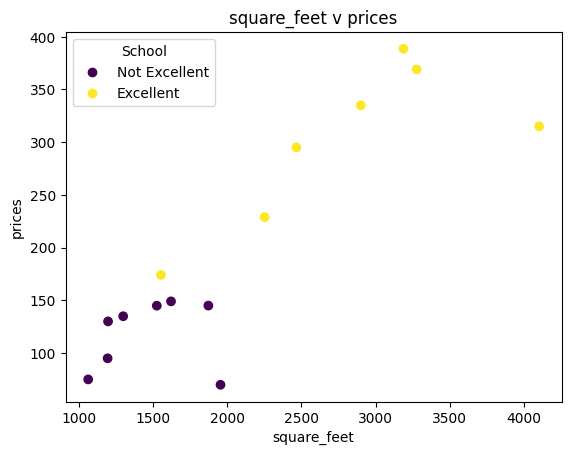

In [99]:
plt.title("square_feet v prices")
plt.xlabel("square_feet")
plt.ylabel("prices")
scatter = plt.scatter(square_feet,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")

$E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2$ 
* Y is house prices
* $\beta_1x$ = sqaure foot
* $\beta_2x$ = other variable

What is the expected value of a house given that the SS is not excellent?

$ E(y) = \beta_0 + \beta_1x_1$

$x_2$ disspears because its values is 0

What about if the SS is excellent?

$ E(y) = \beta_0 + \beta_1x_1 +\beta_2*1$

$ E(y) = \beta_0 + \beta_2 + \beta_1x_1$

In [100]:
all_data = list(zip(square_feet, excellent))
print(all_data) 

[(1872, 0), (1954, 0), (4104, 1), (1524, 0), (1297, 0), (3278, 1), (1192, 0), (2252, 1), (1620, 0), (2466, 1), (3188, 1), (1061, 0), (1195, 0), (1552, 1), (2901, 1)]


In [101]:
all_data = sm.add_constant(all_data)
model = sm.OLS(prices, all_data)
results = model.fit()
print(results.summary())
print(results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     35.94
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           8.57e-06
Time:                        11:29:39   Log-Likelihood:                -76.595
No. Observations:                  15   AIC:                             159.2
Df Residuals:                      12   BIC:                             161.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0749     33.690      0.804      0.4

/home/ndavido/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


*Coefficient*

* sqft: Every square foot added increases the price by 0.621 * 1000 = €62
* Excellent: Excellent school increases prices by 98.647 * 1000 = €98,647

$E(y) = 27.04749 + 0.0621(x_1) + 98.647(x_2)$ 

-> $E(y) = 27.04749 + 0.0621(x_1)$

-> $E(y) = 125... + 0.621(x_1)$

__Multiple Linear Regression with 2 Categorical Variables__

We want to answer the 2 questions:
1. Is the SS in the region excellent and how does it affect house prices?
2. What region (N/S/E/W) of the city is located and how is it related to house prices?

In [102]:
prices = [89, 95, 110, 125, 130, 131, 136, 136, 137, 137, 140, 140, 145, 147, 147, 148, 150, 153, 153, 154, 156, 158, 160, 160, 160, 162, 162, 164, 164, 166, 168, 169, 170, 170, 171, 173, 173, 174, 175, 175, 175, 177, 178, 178, 178, 182, 184, 184, 184, 185, 186, 186, 187, 188, 189, 189, 190, 190, 190, 192, 193, 194, 195, 196, 200, 201, 203, 203, 207, 210, 216, 217, 218, 225, 230, 233, 234, 237, 245, 250, 253, 256, 260, 286, 289, 290, 299, 307, 310, 312, 322, 332, 371, 377, 383, 387, 398, 404, 412, 450]

sqft = [1097, 1505, 1170, 1605, 1787, 2114, 2288, 1731, 2546, 2043, 2455, 2036, 2131, 2641, 2604, 1733, 1683, 2162, 1978, 2112, 2819, 2370, 2515, 2267, 1796, 2771, 2367, 2753, 1980, 2150, 2488, 2274, 2299, 1936, 2414, 2162, 1770, 2007, 2558, 2053, 1764, 2643, 2719, 2692, 1826, 2357, 2647, 2601, 1895, 1943, 2466, 2289, 2248, 2326, 2804, 2686, 2578, 2415, 1845, 2504, 1944, 1814, 2536, 2591, 2902, 1784, 2465, 2341, 2496, 2878, 2573, 2830, 2094, 2027, 2906, 2456, 2409, 3018, 3401, 2953, 2994, 2957, 3312, 2918, 3601, 3213, 2908, 3643, 3485, 3041, 3109, 3207, 3052, 3124, 3076, 3032, 3787, 3073, 3681, 3860]

excellent = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

region = ["East", "East", "West", "South", "West", "South", "North", "West", "North", "West", "South", "South", "South", "North", "West", "North", "West", "South", "East", "North", "North", "East", "North", "South", "West", "West", "North", "East", "South", "East", "North", "South", "West", "South", "North", "West", "East", "North", "North", "East", "West", "West", "North", "East", "West", "South", "West", "South", "East", "South", "North", "East", "West", "South", "South", "West", "East", "East", "North", "West", "East", "South", "East", "West", "East", "East", "West", "East", "South", "East", "West", "South", "North", "South", "North", "South", "North", "East", "East", "East", "West", "North", "West", "West", "South", "South", "East", "East", "North", "South", "East", "West", "West", "West", "North", "South", "West", "South", "North", "North"
]

In [103]:
print(len(prices))
print(len(sqft))
print(len(excellent))
print(len(region))

100
100
100
100


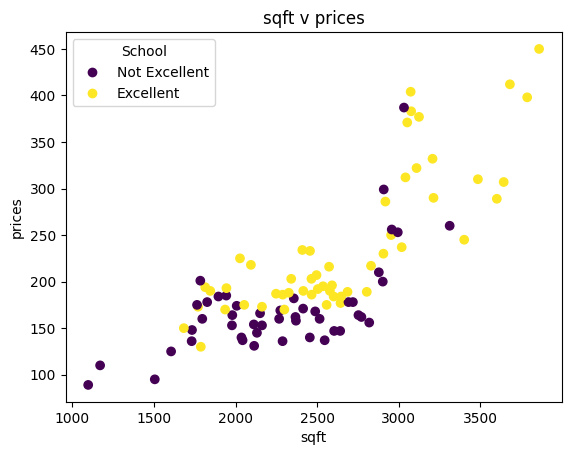

In [104]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")

* Scatterplot of price vs sqft shows a pretty linear relationship
* Smaller homes have smaller prices and larger homes have larger prices.
* Not excellent consistently below excellent
* For a house that is 2500sqft the average price of not excellent is about €160,000 and for the same size excellent was about €200,000

In [105]:
label = []
for i in range(len(region)):
    if region[i] == "East":
        label.append(0)
    elif region[i] == "South":
        label.append(1)
    elif region[i] == "North":
        label.append(2)
    else:
        label.append(3)
        
print(label)

[0, 0, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 3, 2, 3, 1, 0, 2, 2, 0, 2, 1, 3, 3, 2, 0, 1, 0, 2, 1, 3, 1, 2, 3, 0, 2, 2, 0, 3, 3, 2, 0, 3, 1, 3, 1, 0, 1, 2, 0, 3, 1, 1, 3, 0, 0, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 3, 1, 2, 1, 2, 1, 2, 0, 0, 0, 3, 2, 3, 3, 1, 1, 0, 0, 2, 1, 0, 3, 3, 3, 2, 1, 3, 1, 2, 2]


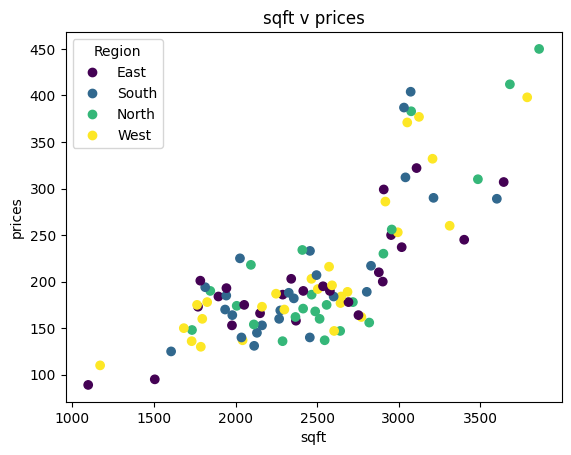

In [106]:
names = ["East", "South", "North", "West"]
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = label)
plt.legend(handles = scatter.legend_elements()[0], labels = names, title = "Region")

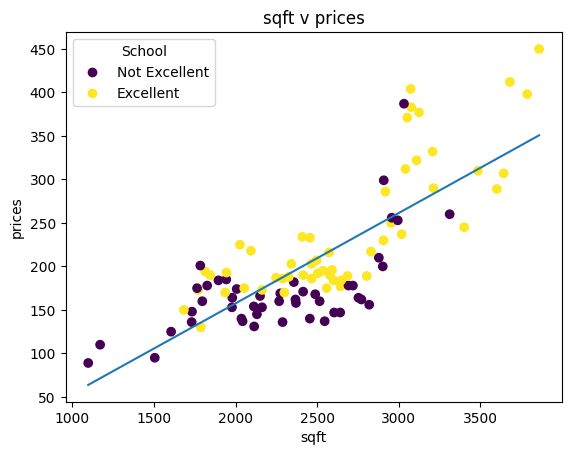

In [107]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")
plt.plot(np.unique(sqft), np.poly1d(np.polyfit(sqft, prices, 1))(np.unique(sqft)))

In [109]:
# Find sqft and price for all excellent and not excellent houses
ne_sqft = []
ne_prices = []
e_sqft = []
e_prices = []
for i in range(len(excellent)):
    if excellent[i] == 0:
        ne_sqft.append(sqft[i])
        ne_prices.append(prices[i])
    else:
        e_sqft.append(sqft[i])
        e_prices.append(prices[i])
        
print(len(ne_sqft))
print(len(ne_prices))
print(len(e_sqft))
print(len(e_prices))

47
47
53
53


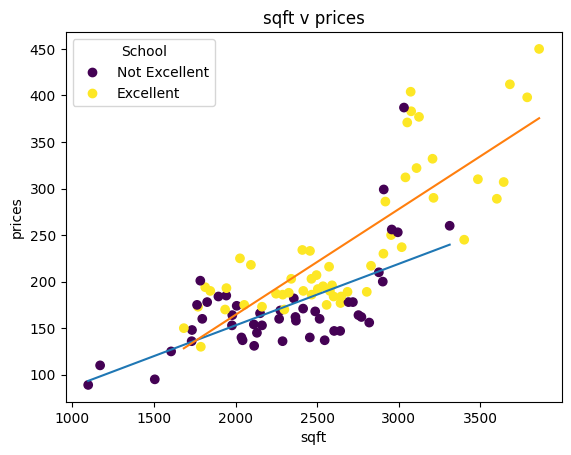

In [112]:
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = excellent)
plt.legend(handles = scatter.legend_elements()[0], labels = legend_names, title = "School")
plt.plot(np.unique(ne_sqft), np.poly1d(np.polyfit(ne_sqft, ne_prices, 1))(np.unique(ne_sqft)))
plt.plot(np.unique(e_sqft), np.poly1d(np.polyfit(e_sqft, e_prices, 1))(np.unique(e_sqft)))

In [113]:
east_sqft = []
east_prices = []
north_sqft = []
north_prices = []
south_sqft = []
south_prices = []
west_sqft = []
west_prices = []

for i in range(len(region)):
    if region[i] == "East":
        east_sqft.append(sqft[i])
        east_prices.append(prices[i])
    elif region[i] == "North":
        north_sqft.append(sqft[i])
        north_prices.append(prices[i])
    elif region[i] == "South":
        south_sqft.append(sqft[i])
        south_prices.append(prices[i])
    else:
        west_sqft.append(sqft[i])
        west_prices.append(prices[i])

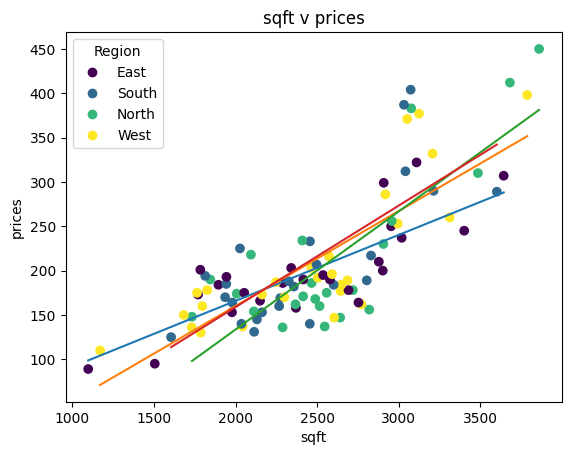

In [120]:
names = ["East", "South", "North", "West"]
plt.title("sqft v prices")
plt.xlabel("sqft")
plt.ylabel("prices")
scatter = plt.scatter(sqft,prices, c = label)
plt.legend(handles = scatter.legend_elements()[0], labels = names, title = "Region")
plt.plot(np.unique(east_sqft), np.poly1d(np.polyfit(east_sqft, east_prices, 1))(np.unique(east_sqft)))
plt.plot(np.unique(west_sqft), np.poly1d(np.polyfit(west_sqft, west_prices, 1))(np.unique(west_sqft)))
plt.plot(np.unique(north_sqft), np.poly1d(np.polyfit(north_sqft, north_prices, 1))(np.unique(north_sqft)))
plt.plot(np.unique(south_sqft), np.poly1d(np.polyfit(south_sqft, south_prices, 1))(np.unique(south_sqft)))

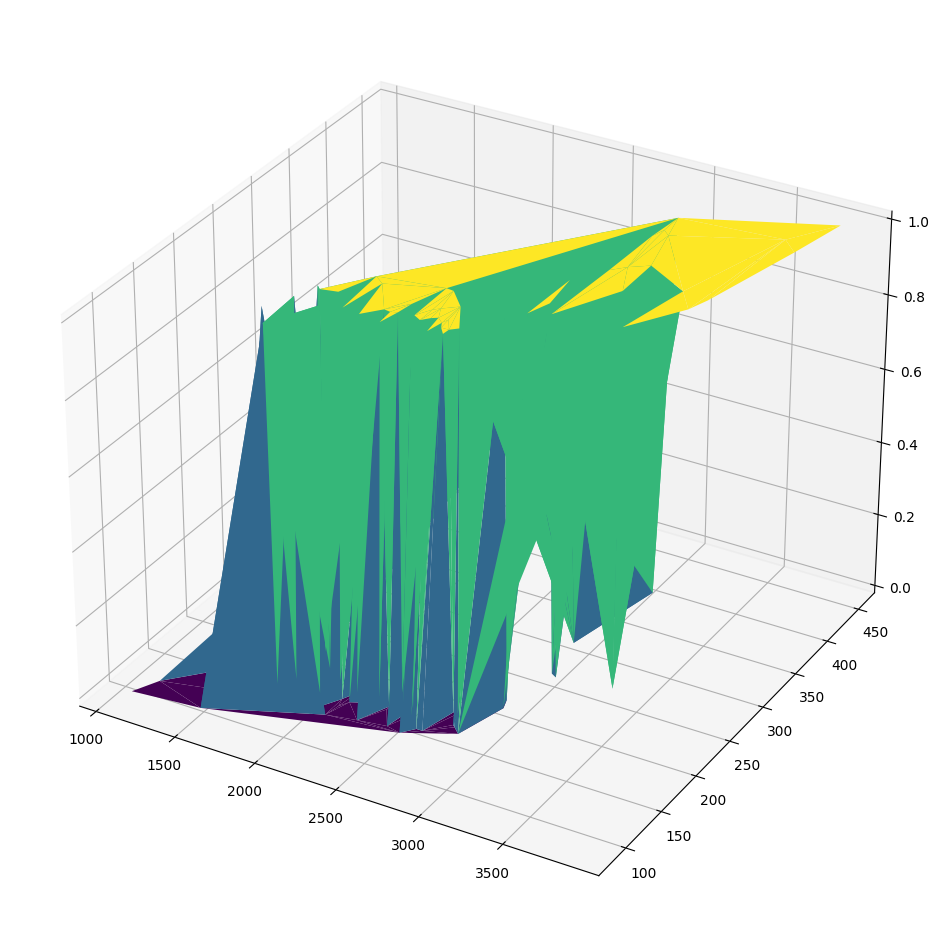

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sqft)
y = np.array(prices)
z = np.array(excellent)
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
plt.show()